**Step: 01**

Load & Explore the Dataset

In [ ]:
import pandas as pd

#Load the dataset
data = pd.read_csv('Mall_Customers.csv')

#Display the first few rows of the dataset
print(data.head())

#Display the summary statistics of the dataset
print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

**Step: 02**

Preprocess the Data

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


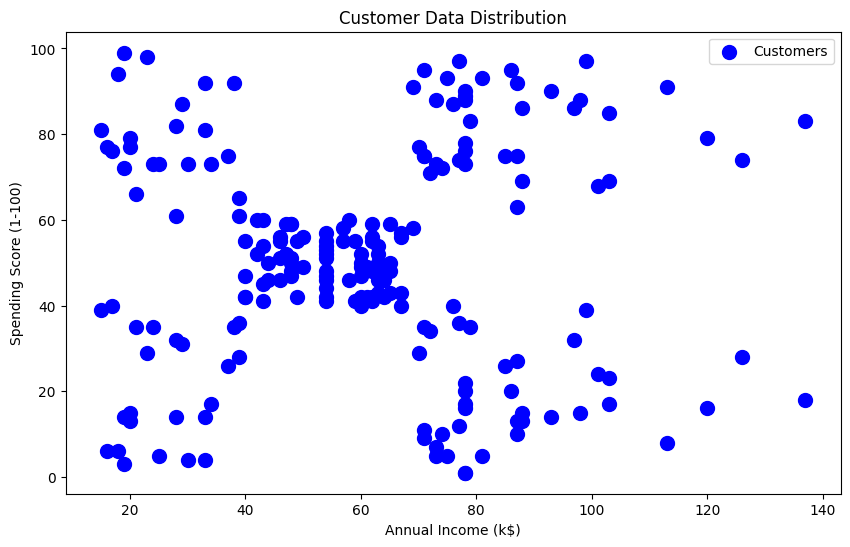

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Select relevant features
features = data[['Annual Income (k$)','Spending Score (1-100)']]

#Display the first few rows of the selected features
print(features.head())

#Visualize the data
plt.figure(figsize=(10,6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], s=100, c='blue', label='Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data Distribution')
plt.legend()
plt.show()

**Step: 03**

Determine the optimal number of clusters

We will use the Elbow Method to determine the optimal number of clusters.

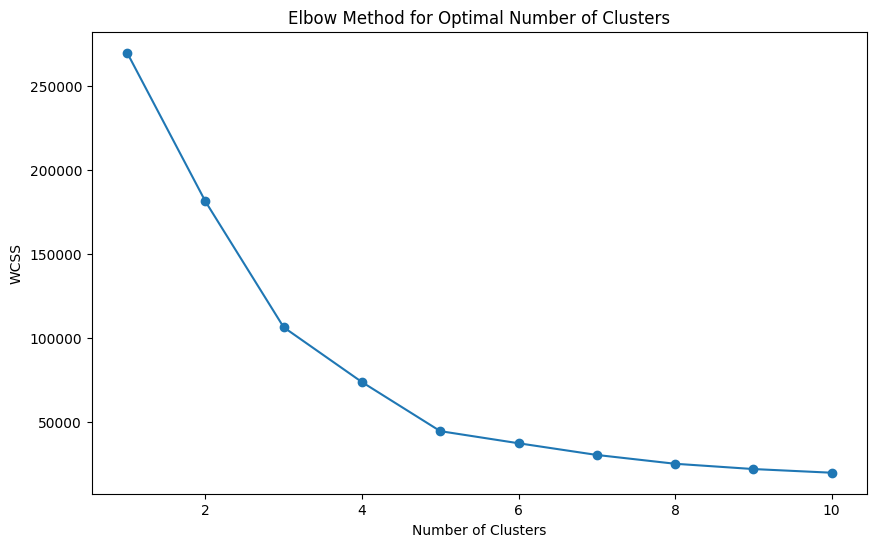

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


**Step 04:**

Apply K-means Clustering


Based on the Elbow Method graph, we will choose the optimal number of clusters (let's assume it is 5).

In [ ]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Add the cluster assignments to the original dataset
data['Cluster'] = clusters

# Display the first few rows of the dataset with cluster assignments
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        3  
2        2  
3        3  
4        2  


**Step 5:**

Visualize the Clusters

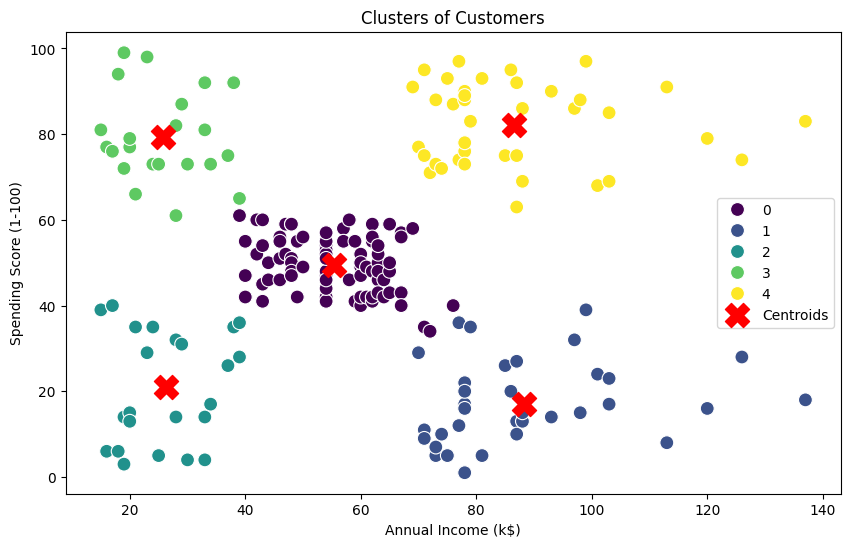

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=data, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()


**Step: 06**

Interpreting the Results

Cluster 0 (Light Blue): Customers with low income and low spending score.

Cluster 1 (Green): Customers with low income and high spending score.

Cluster 2 (Violet): Customers with moderate income and moderate spending score.

Cluster 3 (Dark Blue): Customers with high income and low spending score.

Cluster 4 (Yellow): Customers with high income and high spending score.